## Imports 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set plotting styles and figure sizes
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## Loading the datasets

In [31]:
test = pd.read_csv('data/test.csv')

In [32]:
train = pd.read_csv('data/train.csv')

## Data Exploration

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
train.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
740,741,1,1,"Hawksford, Mr. Walter James",male,NaN,0,0,16988,30.0000,D45,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S
603,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
train[train['Cabin'].isnull()].sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,NaN,S
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S
454,455,0,3,"Peduzzi, Mr. Joseph",male,NaN,0,0,A/5 2817,8.0500,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C


## Data Cleaning

#### Train dataset 

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
# Replace non digit characters with empty string and convert dtype to integer
train['Ticket'] = train['Ticket'].str.replace(r'\D', '', regex=True)
train['Ticket'] = pd.to_numeric(train['Ticket'], errors='coerce')
train['Ticket'] = train['Ticket'].fillna(0).astype(int)

# Replace string with digits and convert dtype to integer
train['Sex'] = train['Sex'].replace({'male': 0, 'female': 1}).astype(int)

# Replace string values with digits and convert dtype as integer 
train['Embarked'] = train['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
train['Embarked'] = train['Embarked'].fillna(0).astype(int)

/var/folders/dz/cpbtp_bj5clg61h2kc3jgjpc0000gn/T/ipykernel_23105/1466620402.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Sex'] = train['Sex'].replace({'male': 0, 'female': 1}).astype(int)
/var/folders/dz/cpbtp_bj5clg61h2kc3jgjpc0000gn/T/ipykernel_23105/1466620402.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Embarked'] = train['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})


In [40]:
train['Cabin'].isna().sum()

687

In [41]:
train.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
746,747,0,3,"Abbott, Mr. Rossmore Edward",0,16.0,1,1,2673,20.2500,NaN,0
350,351,0,3,"Odahl, Mr. Nils Martin",0,23.0,0,0,7267,9.2250,NaN,0
620,621,0,3,"Yasbeck, Mr. Antoni",0,27.0,1,0,2659,14.4542,NaN,1
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",1,19.0,1,0,11967,91.0792,B49,1
601,602,0,3,"Slabenoff, Mr. Petco",0,NaN,0,0,349214,7.8958,NaN,0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",1,19.0,1,0,350046,7.8542,NaN,0
283,284,1,3,"Dorking, Mr. Edward Arthur",0,19.0,0,0,510482,8.0500,NaN,0
82,83,1,3,"McDermott, Miss. Brigdet Delia",1,NaN,0,0,330932,7.7875,NaN,2
698,699,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,1
695,696,0,2,"Chapman, Mr. Charles Henry",0,52.0,0,0,248731,13.5000,NaN,0


### Test dataset 

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [43]:
# Replace non digit characters with empty string and convert dtype to integer
test['Ticket'] = test['Ticket'].str.replace(r'\D', '', regex=True)
test['Ticket'] = pd.to_numeric(test['Ticket'], errors='coerce')
test['Ticket'] = test['Ticket'].fillna(0).astype(int)

# Replace string with digits and convert dtype to integer
test['Sex'] = test['Sex'].replace({'male': 0, 'female': 1}).astype(int)

# Replace string values with digits and convert dtype as integer 
test['Embarked'] = test['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
test['Embarked'] = test['Embarked'].fillna(0).astype(int)

/var/folders/dz/cpbtp_bj5clg61h2kc3jgjpc0000gn/T/ipykernel_23105/915043623.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Sex'] = test['Sex'].replace({'male': 0, 'female': 1}).astype(int)
/var/folders/dz/cpbtp_bj5clg61h2kc3jgjpc0000gn/T/ipykernel_23105/915043623.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Embarked'] = test['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})


## Target distribution 

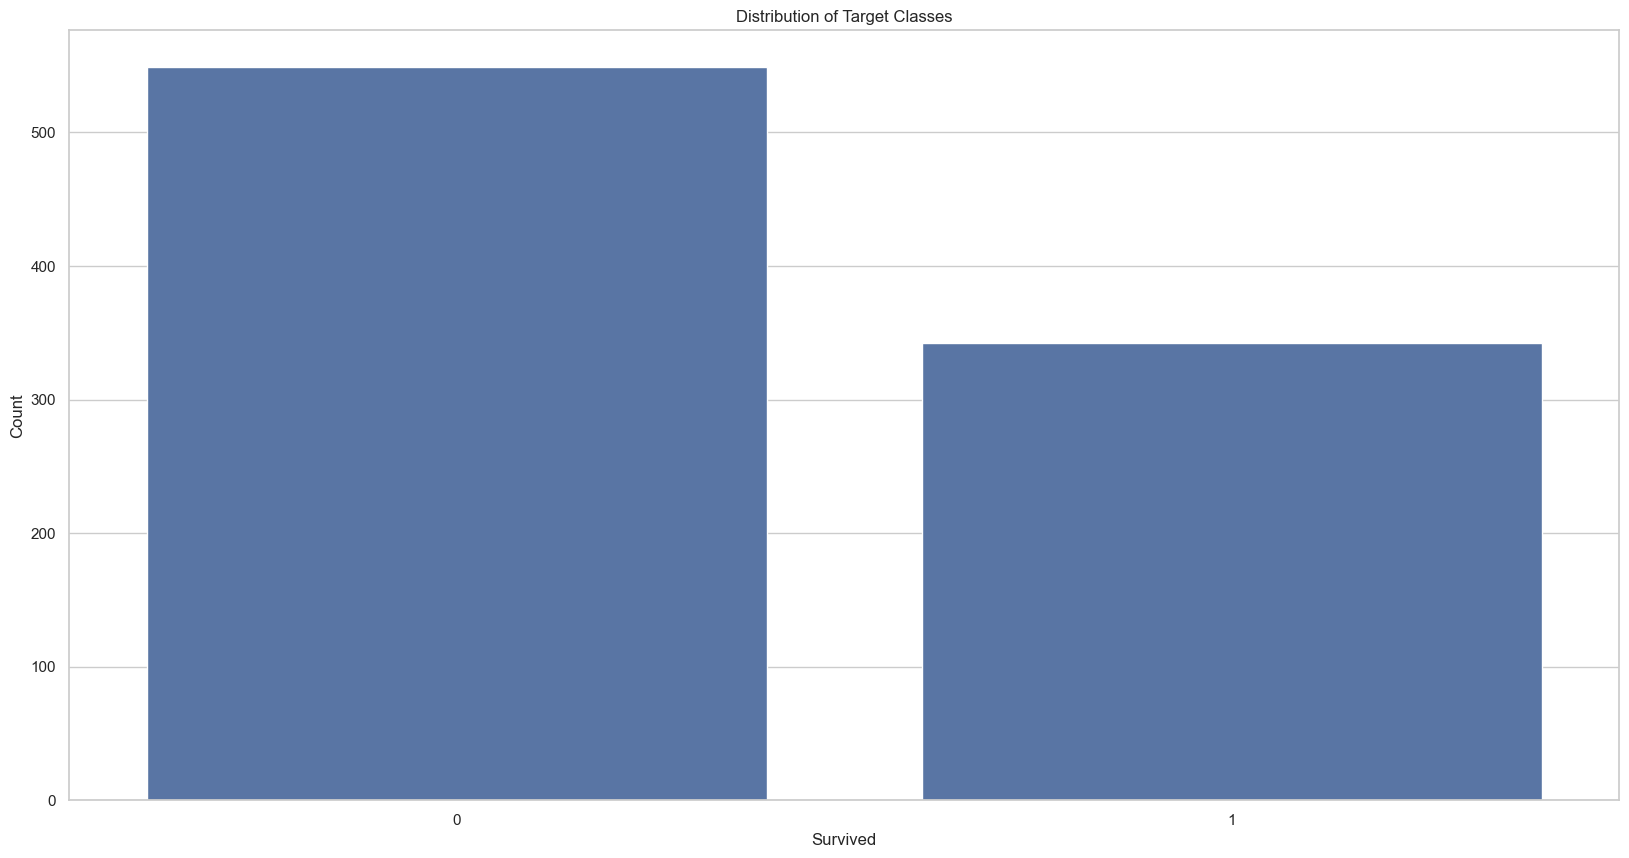

Survived
0    549
1    342
Name: count, dtype: int64


In [44]:
# Count plot of the target variable
plt.figure(figsize=(20,10))
sns.countplot(data=train, x='Survived')
plt.title("Distribution of Target Classes")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

# Also print the numerical counts
print(train['Survived'].value_counts())

## Feature Distribution

In [45]:
train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

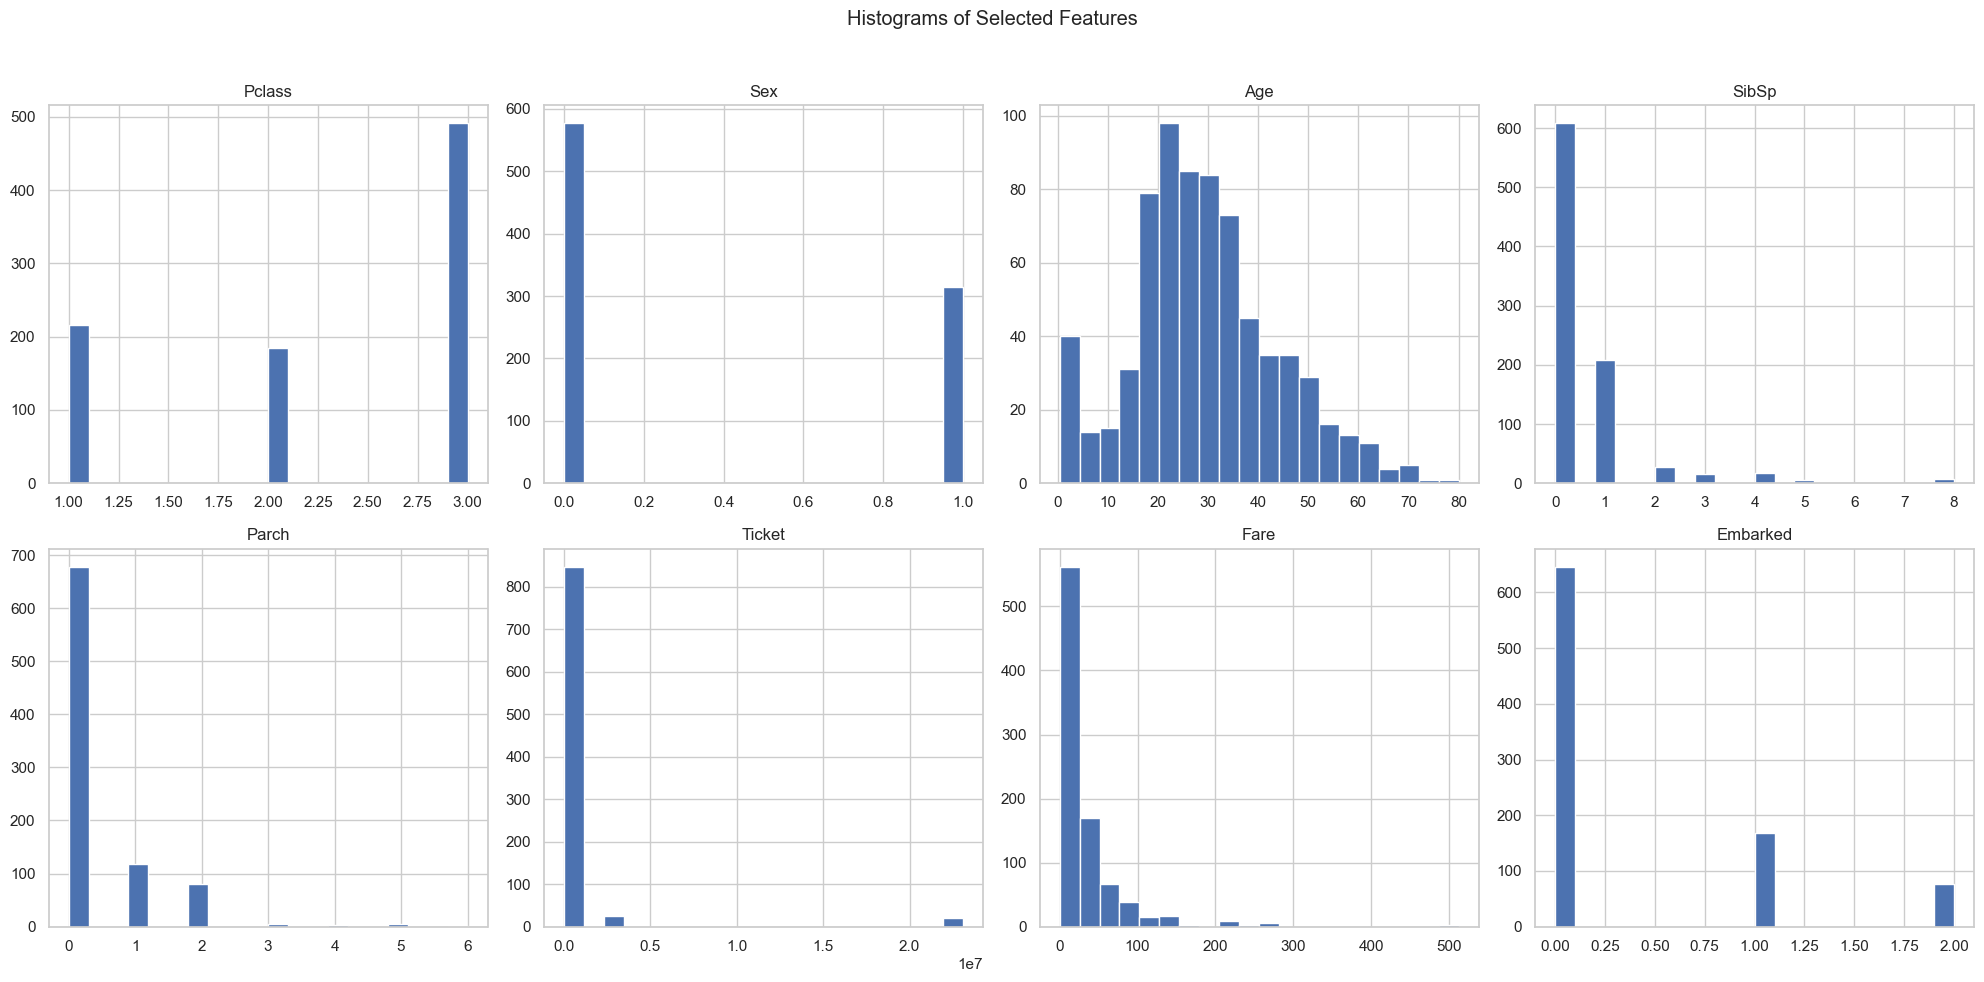

In [46]:
# Plot histograms for a selection of features
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']

train[selected_features].hist(bins=20, figsize=(20, 10), layout=(2, 4))
plt.suptitle("Histograms of Selected Features")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [47]:
train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Correlation Analysis

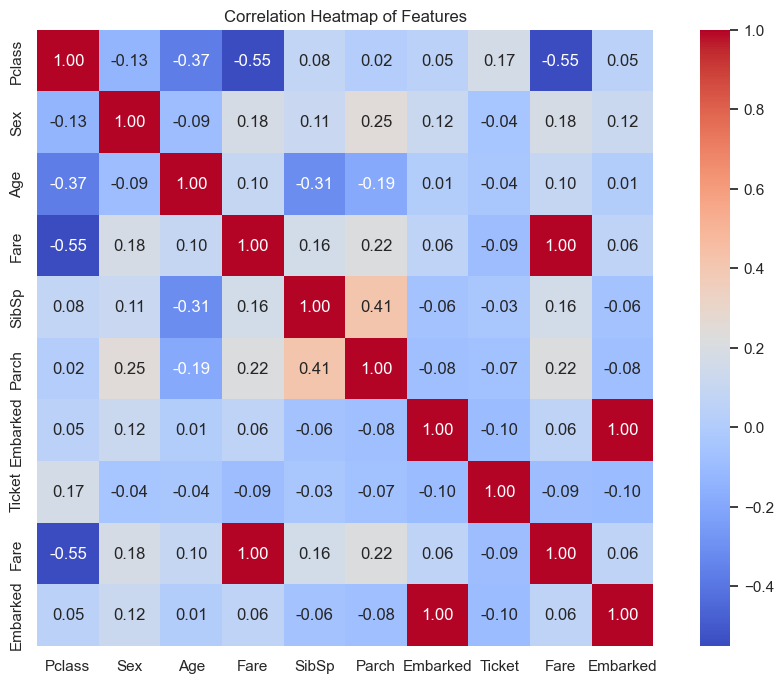

In [48]:
# Select specific columns from the train DataFrame
selected_columns = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Ticket', 'Fare', 'Embarked'] 

# Compute the correlation matrix for the selected columns
corr_matrix = train[selected_columns].corr()

# Plot the correlation heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

## Pair Plot for a Subset of Features

In [49]:
train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

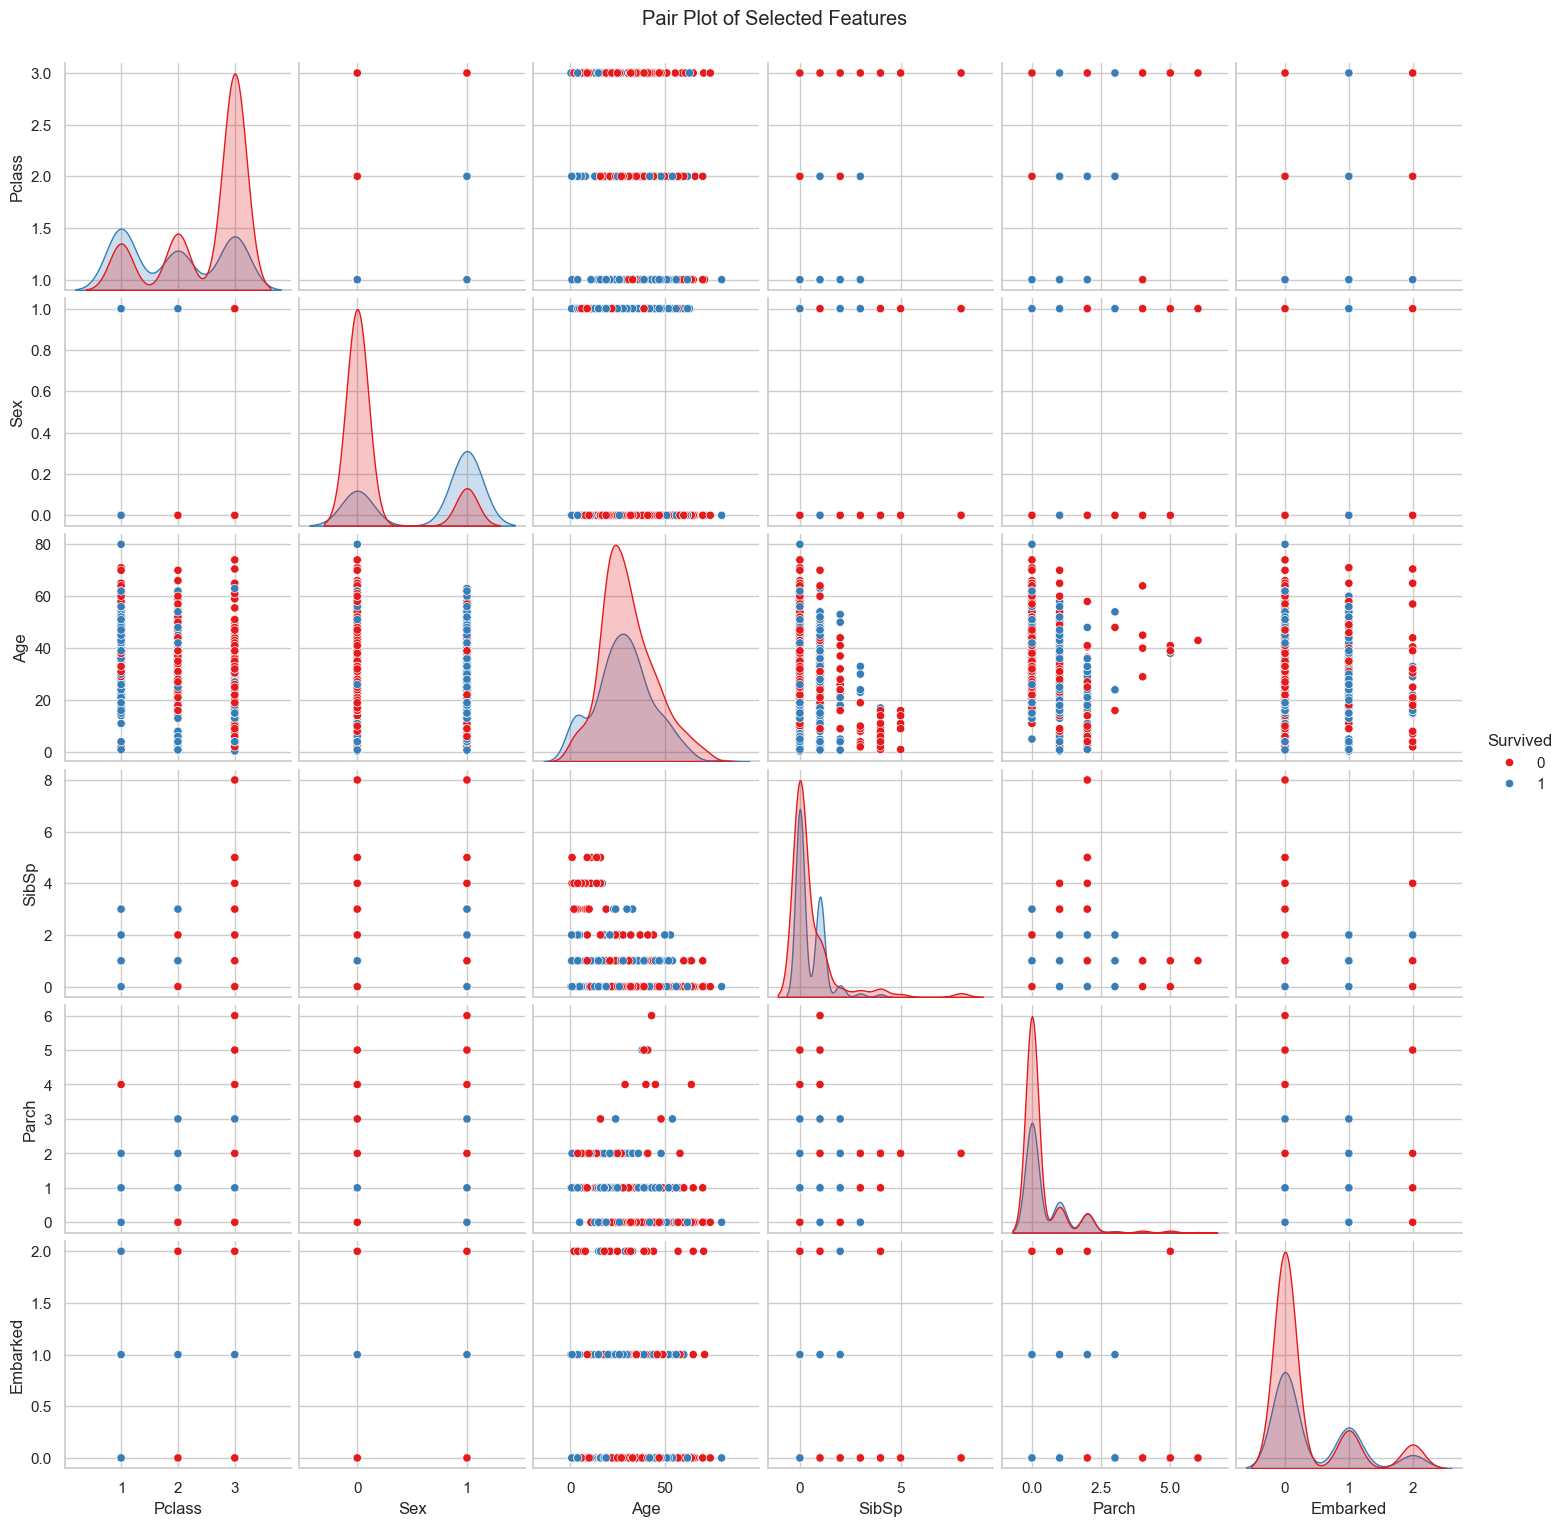

In [50]:
subset_features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']

sns.pairplot(train[subset_features], hue="Survived", palette="Set1", diag_kind="kde")
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

## Preprocessing

In [51]:
# We split the dataset into training and testing sets.
# Although this dataset is already preprocessed, many real-world scenarios require additional cleaning steps.
# Here, we simply perform an 80/20 train-test split.

# Define features (X) and target (y)
selected_features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Ticket', 'Fare', 'Embarked'] 
x = train[selected_features]
y = train['Survived']

# Split the data into 80% training and 20% testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape[0]} samples")
print(f"Testing set size: {x_test.shape[0]} samples")

Training set size: 712 samples
Testing set size: 179 samples


## 4. Training the Decision Tree

We now create and train a Decision Tree classifier. Key parameters include:

- **max_depth:** Limits the maximum depth of the tree to help prevent overfitting.
- **min_samples_split:** The minimum number of samples required to split an internal node.

We will use a relatively shallow tree (e.g., `max_depth=3`) to maintain interpretability.

In [52]:
# initialize the decision tree classifier with a maximum depth of 10
clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# train the model on the training data 
clf.fit(x_train, y_train)
print('Decision three model trained successfully!')

Decision three model trained successfully!


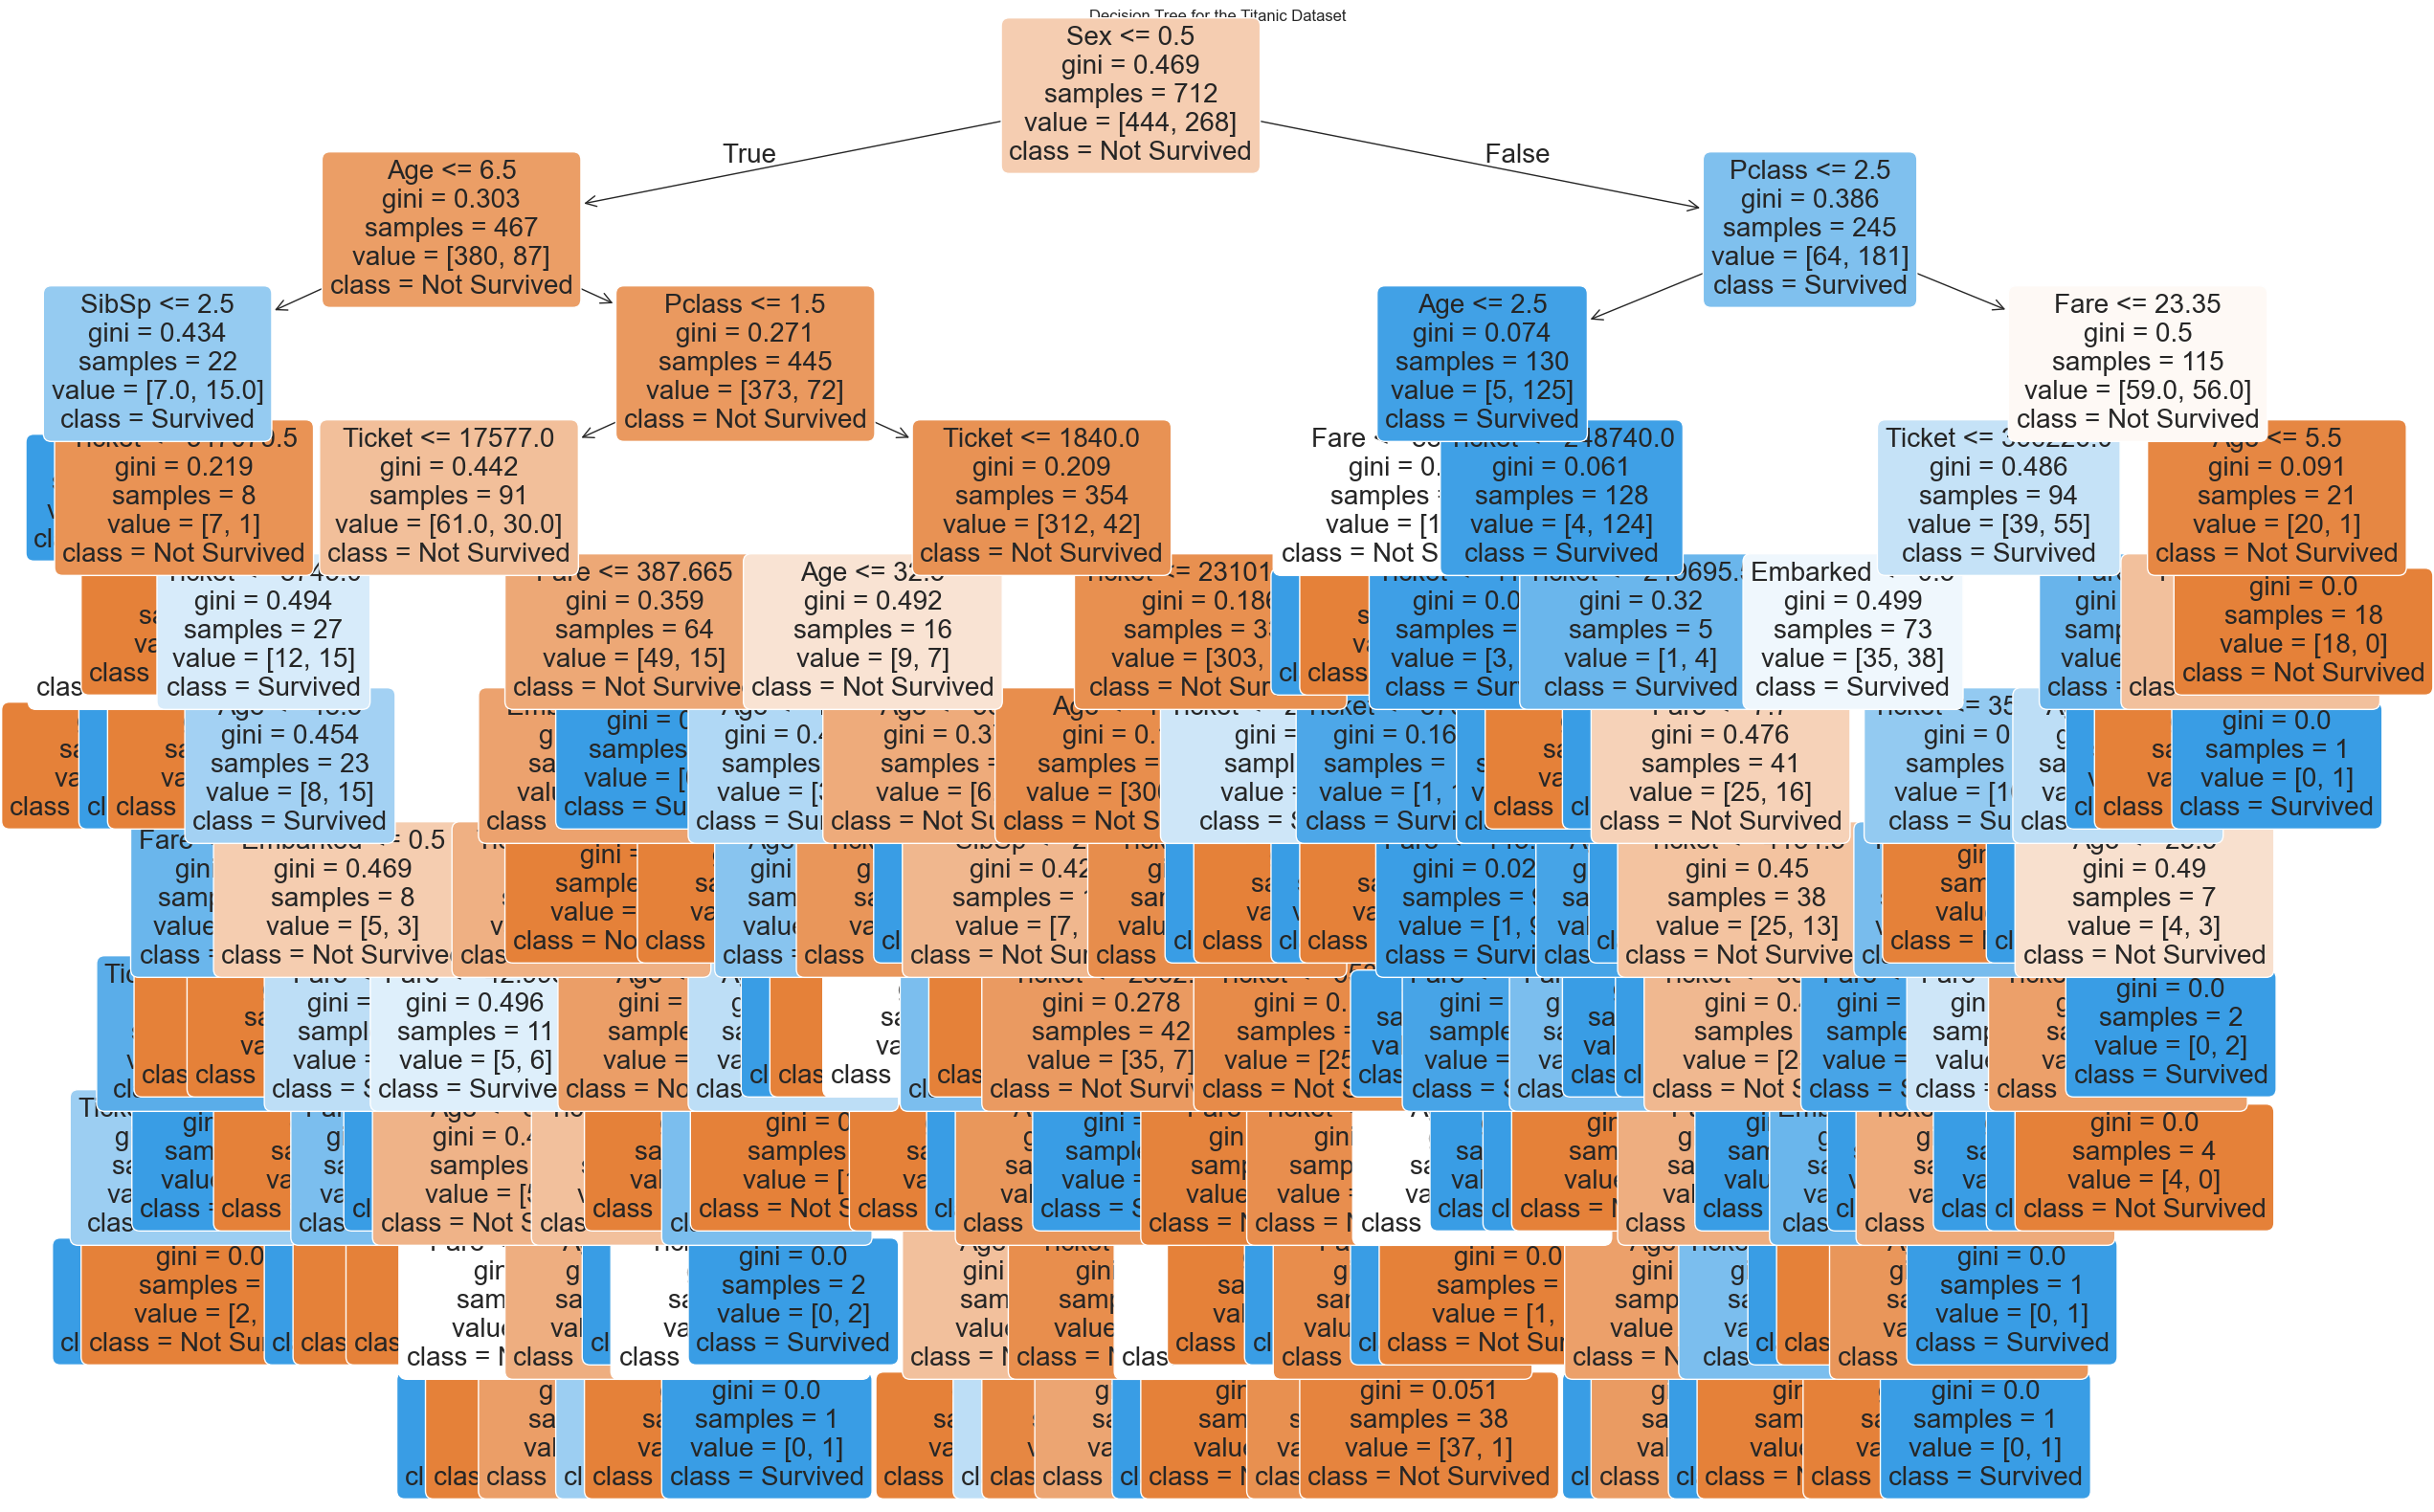

In [53]:
plt.figure(figsize=(30, 20))
plot_tree(
    clf,
    feature_names=selected_features,
    class_names=["Not Survived", "Survived"],  # labels for 0 and 1
    filled=True,
    rounded=True,
    fontsize=20
)
plt.title("Decision Tree for the Titanic Dataset")
plt.show()

## 6. Evaluating the Model with Additional Classification Metrics

We evaluate our model using several metrics:

- **Accuracy:** The proportion of correct predictions.
- **Classification Report:** Precision, recall, and F1-score for each class.
- **Confusion Matrix:** A detailed summary of prediction performance.

Seaborn is used to generate an advanced heatmap of the confusion matrix.

Accuracy on the test set: 0.79

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.79      0.89      0.83       105
    Survived       0.80      0.66      0.73        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
[[93 12]
 [25 49]]


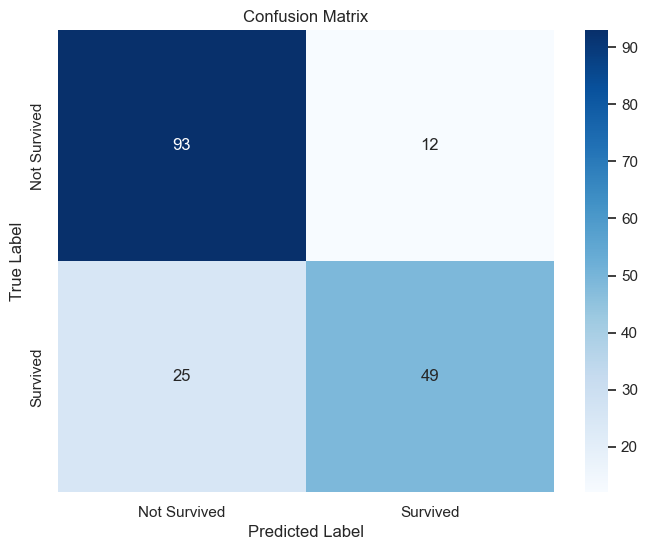

In [54]:
# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

# Generate a Classification Report (includes precision, recall, and F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Survived", "Survived"]))

# Compute the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the Confusion Matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## 7. Hyperparameter Optimization using Grid Search

We now use `GridSearchCV` to search for the best hyperparameters for the Decision Tree classifier. The grid includes:

- **max_depth:** Maximum depth of the tree.
- **min_samples_split:** Minimum number of samples required to split an internal node.
- **criterion:** Function to measure the quality of a split (either "gini" or "entropy").

In [55]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Output the best parameters and corresponding accuracy
print("Best Parameters found:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

Best Parameters found:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.82



Optimized Model Accuracy on the test set: 0.80

Optimized Model Classification Report:
              precision    recall  f1-score   support

Not Survived       0.80      0.88      0.84       105
    Survived       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Optimized Model Confusion Matrix:
[[92 13]
 [23 51]]


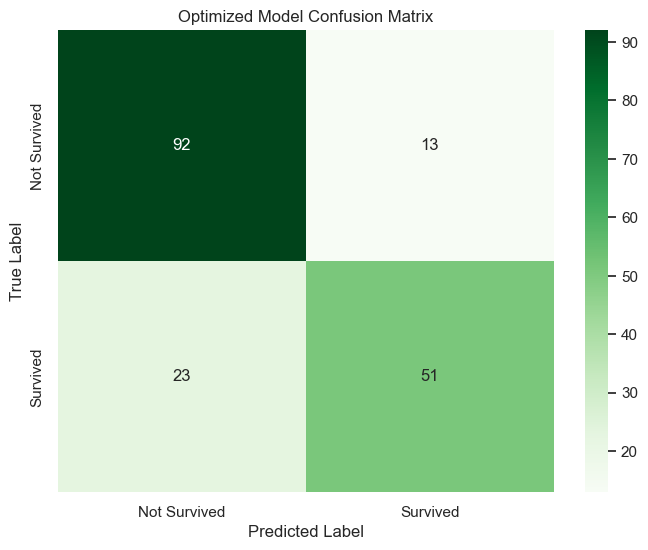

In [56]:
# Retrieve the best estimator from GridSearchCV
best_clf = grid_search.best_estimator_

# Train the optimized model on the training data
best_clf.fit(x_train, y_train)

# Make predictions with the optimized model on the test set
y_pred_optimized = best_clf.predict(x_test)

# Calculate the accuracy of the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"\nOptimized Model Accuracy on the test set: {accuracy_optimized:.2f}")

# Generate a Classification Report for the optimized model
print("\nOptimized Model Classification Report:")
print(classification_report(y_test, y_pred_optimized, target_names=["Not Survived", "Survived"]))

# Compute and print the Confusion Matrix for the optimized model
cm_optimized = confusion_matrix(y_test, y_pred_optimized)
print("Optimized Model Confusion Matrix:")
print(cm_optimized)

# Visualize the Optimized Model's Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimized, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Optimized Model Confusion Matrix")
plt.show()

## Make predictions on the test set

In [ ]:
selected_features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Ticket', 'Fare', 'Embarked'] 
X_test = test[selected_features]

# Make predictions with the optimized model on the test set
predictions = best_clf.predict(X_test)

# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})

# Save to CSV
submission.to_csv('submission.csv', index=False)